<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_0_8_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.456077,55.411657,79.542177,45.080072,278.489983,241.874656,36.615327
1,0.0,1.0,83.757373,38.169304,67.682594,-21.574667,178.034604,207.064233,-29.029629
2,0.0,2.0,44.648659,80.925374,74.154127,10.860639,220.588798,213.443544,7.145253
3,0.0,3.0,31.213815,31.689334,80.052018,13.935331,166.890498,157.856530,9.033968
4,0.0,4.0,51.162076,96.769346,31.307822,-9.864883,179.374361,188.548942,-9.174581
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,60.446425,45.729301,37.702548,-13.039125,140.839149,154.018361,-13.179211
119996,999.0,116.0,34.218430,73.134523,51.988492,-39.228259,130.113185,164.520769,-34.407584
119997,999.0,117.0,43.875437,48.944090,93.519557,27.226080,223.565165,197.553689,26.011476
119998,999.0,118.0,31.763759,94.301593,28.977407,-62.118135,102.924624,155.424855,-52.500231


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    88.456077  55.411657  79.542177  ...  278.489983  241.874656  36.615327
      1.0    83.757373  38.169304  67.682594  ...  178.034604  207.064233 -29.029629
      2.0    44.648659  80.925374  74.154127  ...  220.588798  213.443544   7.145253
      3.0    31.213815  31.689334  80.052018  ...  166.890498  157.856530   9.033968
      4.0    51.162076  96.769346  31.307822  ...  179.374361  188.548942  -9.174581
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  60.446425  45.729301  37.702548  ...  140.839149  154.018361 -13.179211
      116.0  34.218430  73.134523  51.988492  ...  130.113185  164.520769 -34.407584
      117.0  43.875437  48.944090  93.519557  ...  223.565165  197.553689  26.011476
      118.0  31.763759  94.301593  28.977407  ...  102.924624  155.424855 -52.500231
      119.0  96.449761  45.075649  63.374032  ...  227.495330  216.294867  11.200463

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    88.456077  55.411657  79.542177  ...  278.489983  241.874656  36.615327
      1.0    83.757373  38.169304  67.682594  ...  178.034604  207.064233 -29.029629
      2.0    44.648659  80.925374  74.154127  ...  220.588798  213.443544   7.145253
      3.0    31.213815  31.689334  80.052018  ...  166.890498  157.856530   9.033968
      4.0    51.162076  96.769346  31.307822  ...  179.374361  188.548942  -9.174581
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  60.446425  45.729301  37.702548  ...  140.839149  154.018361 -13.179211
      116.0  34.218430  73.134523  51.988492  ...  130.113185  164.520769 -34.407584
      117.0  43.875437  48.944090  93.519557  ...  223.565165  197.553689  26.011476
      118.0  31.763759  94.301593  28.977407  ...  102.924624  155.424855 -52.500231
      119.0  96.449761  45.075649  63.374032  ...  227.495330  216.294867  11.200463

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.456077,55.411657,79.542177,45.080072,278.489983,241.874656,36.615327
1,0.0,1.0,83.757373,38.169304,67.682594,-21.574667,178.034604,207.064233,-29.029629
2,0.0,2.0,44.648659,80.925374,74.154127,10.860639,220.588798,213.443544,7.145253
3,0.0,3.0,31.213815,31.689334,80.052018,13.935331,166.890498,157.856530,9.033968
4,0.0,4.0,51.162076,96.769346,31.307822,-9.864883,179.374361,188.548942,-9.174581
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,60.446425,45.729301,37.702548,-13.039125,140.839149,154.018361,-13.179211
119996,999.0,116.0,34.218430,73.134523,51.988492,-39.228259,130.113185,164.520769,-34.407584
119997,999.0,117.0,43.875437,48.944090,93.519557,27.226080,223.565165,197.553689,26.011476
119998,999.0,118.0,31.763759,94.301593,28.977407,-62.118135,102.924624,155.424855,-52.500231


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    88.456077  55.411657  79.542177  ...  278.489983  241.874656  36.615327
      1.0    83.757373  38.169304  67.682594  ...  178.034604  207.064233 -29.029629
      2.0    44.648659  80.925374  74.154127  ...  220.588798  213.443544   7.145253
      3.0    31.213815  31.689334  80.052018  ...  166.890498  157.856530   9.033968
      4.0    51.162076  96.769346  31.307822  ...  179.374361  188.548942  -9.174581
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  60.446425  45.729301  37.702548  ...  140.839149  154.018361 -13.179211
      116.0  34.218430  73.134523  51.988492  ...  130.113185  164.520769 -34.407584
      117.0  43.875437  48.944090  93.519557  ...  223.565165  197.553689  26.011476
      118.0  31.763759  94.301593  28.977407  ...  102.924624  155.424855 -52.500231
      119.0  96.449761  45.075649  63.374032  ...  227.495330  216.294867  11.200463

[120000 rows x 7 columns]

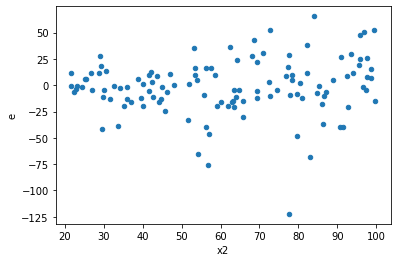

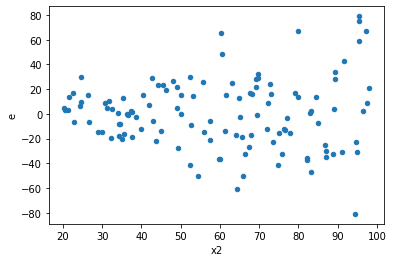

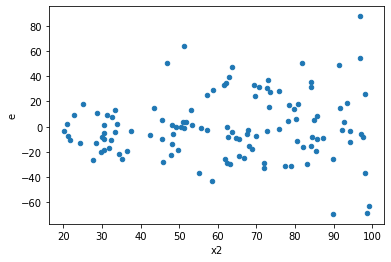

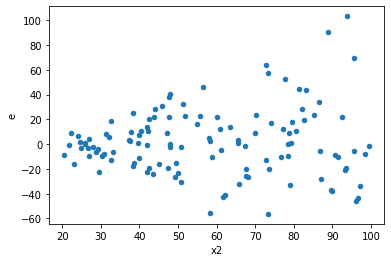

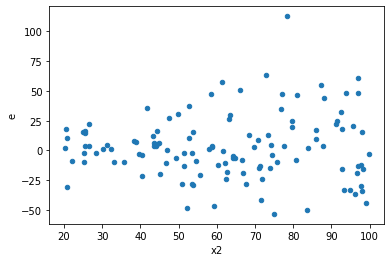

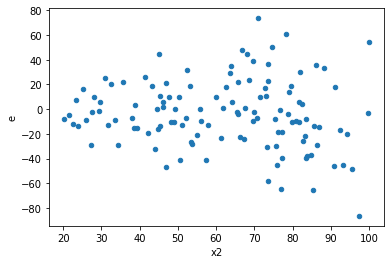

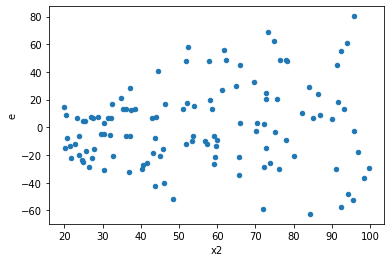

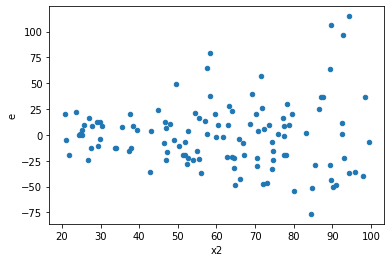

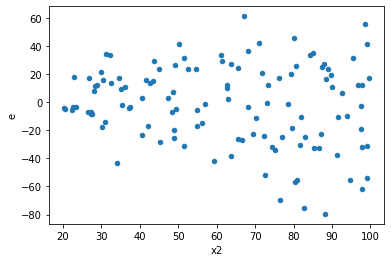

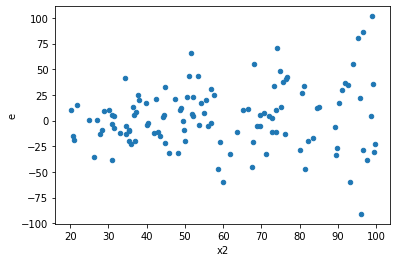

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,62.0,52.0,15471.672583395648,38548.50347805957,253.63397677697785,755.853009373717,2.9706986737275436,5.10174419148246e-05,0.9999744912790426,Reject005=0 : Heteroscedasticity
1.0,49.0,65.0,21131.473288461068,73979.23828100773,440.2390268429389,1155.9255981407457,2.639142263358358,0.000544116799138683,0.9997279416004307,Reject005=0 : Heteroscedasticity
3.0,64.0,50.0,23857.654904574298,43872.94596018559,378.69293499324283,895.3662440854202,2.353851250412309,0.0013196219975040169,0.999340189001248,Reject005=0 : Heteroscedasticity
7.0,57.0,57.0,35428.961557123475,69781.82404004935,632.6600278057764,1246.104000715167,1.969626570271822,0.011604891553792296,0.9941975542231039,Reject005=0 : Heteroscedasticity
9.0,56.0,58.0,44247.109667558725,46205.22239129792,804.4929030465223,810.6179366894371,1.008245266091861,0.976622941457187,0.5116885292714065,Reject005=1 : Homoscedasticity
11.0,59.0,55.0,21980.073540532125,65978.61008105241,378.96678518158836,1221.8261126120817,3.2200553979070086,1.654566957265402e-05,0.9999917271652137,Reject005=0 : Heteroscedasticity
12.0,55.0,59.0,33917.59540500444,38289.06423646519,628.1036186111933,660.1562799390549,1.0523504112972735,0.8504985072686182,0.5747507463656909,Reject005=1 : Homoscedasticity
13.0,51.0,63.0,37171.39260418348,46256.075686107586,743.4278520836696,746.065736872703,1.0073713137889044,0.9855797425872703,0.5072101287063648,Reject005=1 : Homoscedasticity
14.0,48.0,66.0,24005.147765840848,55590.48314514408,510.7478248051244,855.2382022329858,1.6841988510859456,0.0595234473891455,0.9702382763054272,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,62.0,52.0,15471.672583395648,38548.50347805957,253.63397677697785,755.853009373717,2.9706986737275436,5.10174419148246e-05,Reject005=0 : Heteroscedasticity
1.0,49.0,65.0,21131.473288461068,73979.23828100773,440.2390268429389,1155.9255981407457,2.639142263358358,0.000544116799138683,Reject005=0 : Heteroscedasticity
2.0,63.0,51.0,84954.31970435554,13553.760547888485,1370.2309629734764,271.0752109577697,0.19708098110925168,1.775056952235931e-08,Reject005=0 : Heteroscedasticity
3.0,64.0,50.0,23857.654904574298,43872.94596018559,378.69293499324283,895.3662440854202,2.353851250412309,0.0013196219975040169,Reject005=0 : Heteroscedasticity
4.0,56.0,58.0,62693.36901326312,49777.36732483713,1139.8794366047841,873.2871460497742,0.7666027067780298,0.3174824911799424,Reject005=1 : Homoscedasticity
5.0,55.0,59.0,51426.66998550326,28664.976063282258,952.3457404722825,494.22372522900446,0.5196056416473144,0.01428736217093326,Reject005=0 : Heteroscedasticity
6.0,51.0,63.0,30635.390883139968,26249.845153913557,612.7078176627994,423.38459925667024,0.6936381105586276,0.16711237639488014,Reject005=1 : Homoscedasticity
7.0,57.0,57.0,35428.961557123475,69781.82404004935,632.6600278057764,1246.104000715167,1.969626570271822,0.011604891553792296,Reject005=0 : Heteroscedasticity
8.0,63.0,51.0,55491.766909452424,29591.74355827907,895.0284985395552,591.8348711655814,0.6587374809691944,0.12501623024455366,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      540
Reject005=0 : Heteroscedasticity    460
Name: Result_test, dtype: int64